## 1. Базовая задача МНК.


**Теоретический вопрос 1.**

Пусть дана выборка точек $y_i$. Решите аналитически задачу МНК, моделируя данные постоянной величиной $\check{y}$, что отвечает минимизации функции потерь
$$
\mathcal{L}=\sum_{i=1}^l\left(y_i-\check{y}\right)^2 \rightarrow \min _{\breve{y}} .
$$

Решение:

Возьмем производную функции $\mathcal{L}$: $$\frac{δ\mathcal{L}}{δ \check{y}} = -2 \sum_{i=1}^l(y_i - \check{y} ) = 0$$

$$\sum_{i= 1}^ly_i - \sum_{i=1}^l \check{y} = \sum_{i= 1}^ly_i - l * \check{y} = 0$$

Отсюда получем оценку константы $\check{y}$:

$$\check{y} = \frac{1}{l} \sum_{i=1}^l y_i$$


**Теоретический вопрос 2.**

Покажите, что прямая, построенная по методу МНК, всегда проходит через точку $(\bar{x}, \bar{y})$, где $\bar{x}$ и $\bar{y}$ - выборочные средние. Обобщите на случай многомерной регрессии.


Для простоты рассмотрим случай одномерной регрессии, где у нас есть набор пар данных {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}. Мы хотим подобрать прямую вида y = ax + b, минимизируя сумму квадратов отклонений (метод наименьших квадратов).

Коэффициент наклона по МНК выражается как

$$a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i- \bar{x})^2}$$

Теперь выразим коэффицент b.
$$b = \frac{1}{l}\sum(y_i - ax_i) = \bar{y} - a\bar{x}$$
Подставим найденные коэффициенты и посмотрим, какое значение будет иметь найденная функция в точке $\bar{x}$.
$$y = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i- \bar{x})^2} \bar{x} + \bar{y} -  \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i- \bar{x})^2}\bar{x} = \bar{y}$$

Получаем, что прямая построенная по МНК, проходит через ($\bar{x}$, $\bar{y}$)

Теперь обощим это решение  на многомерный случай. Пусть есть следующая модель:  

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$$
Тогда коэффициенты будут выражаться следующим образом:

$$a = \frac{\sum_{i=1}^n (x_{ij} - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_{ij}- \bar{x})^2}$$

$$b = \bar{y} - \sum_{i=1}^n a_ix_i$$

Аналогично предыдущему пункту получим, что прямая, полученная по МНК, проходит через точку, координаты которой является средним значением переменных.

__Практическое задание.__

Для четырех выборок из квартета Энскомба вычислите выборочные дисперсии  x  и  y  координат, а также коэффициент линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе јuруter с помощью библиотеки seaborn, вызвав метод load_dataset('anscombe') .

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Квартет Энскомба - 4 различных набора данных с одинаковыми стат. характеристиками, 
#подчеркивающие важность визуализации данных для полного понимания их распределения и свойств.

#Коэффициент линейной корреляции Пирсона -  насколько 2 переменные изменяются вместе. 
#1 - положительную связь, -1 - отрицательную, 0 - отсутствие линейной связи.

[10.0, 10.0, 10.0, 10.0]
[3.752062809917356, 3.7523900826446277, 3.747836363636364, 3.74840826446281]
0.81642051634484


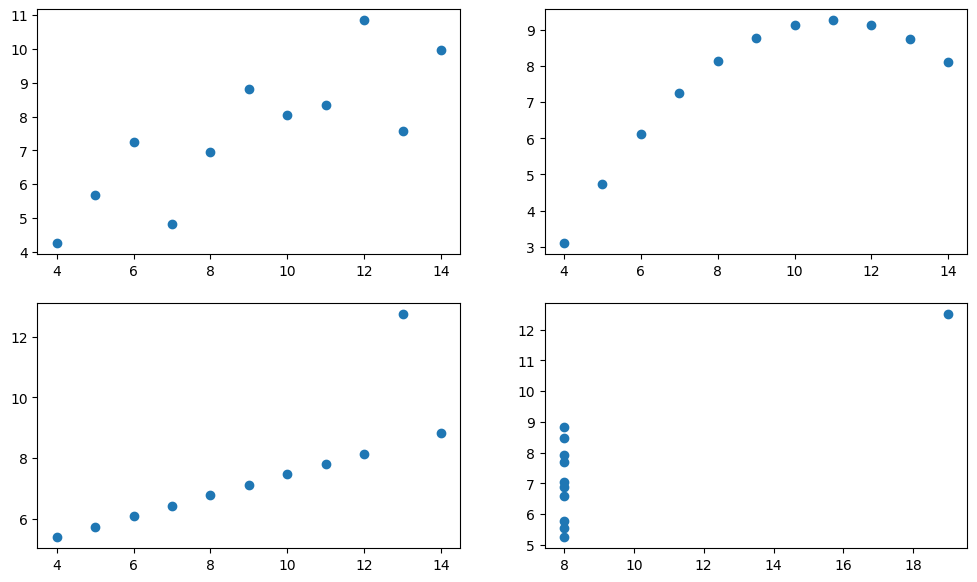

In [3]:
anscombe = sns.load_dataset('anscombe') # Загрузили данные Энскомба

# Отфильтровываем данные по 'dataset', создавая четыре поднабора данных
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

Sx = [0,0,0,0] #список для хранения выборочных дисперсий по x для каждого поднабора

# Вычисляем выборочные дисперсии по x для каждого поднабора данных
n0 = len(dataset_1['x'])
meanX0 = sum(dataset_1['x']) / n0
Sx[0] = 1 / n0 * sum((x - meanX0) ** 2 for x in dataset_1['x'])

n1 = len(dataset_2['x'])
meanX1 = sum(dataset_2['x']) / n1
Sx[1] = 1 / n1  * sum((x - meanX1) ** 2 for x in dataset_2['x'])

n2 = len(dataset_3['x'])
meanX2 = sum(dataset_3['x']) / n2
Sx[2] = 1 / n2  * sum((x - meanX2) ** 2 for x in dataset_3['x'])

n3 = len(dataset_4['x'])
meanX3 = sum(dataset_4['x']) / n3
Sx[3] = 1 / n3  * sum((x - meanX3) ** 2 for x in dataset_4['x'])

print(Sx)

Sy = [0,0,0,0] # Инициализируем список для хранения выборочных дисперсий по y для каждого поднабора

# Вычисляем выборочные дисперсии по y для каждого поднабора данных

m0 = len(dataset_1['y'])
meanY0 = sum(dataset_1['y']) / m0
Sy[0] = 1 / m0 * sum((y - meanY0) ** 2 for y in dataset_1['y'])

m1 = len(dataset_2['y'])
meanY1 = sum(dataset_2['y']) / m1
Sy[1] = 1 / m1 * sum((y - meanY1) ** 2 for y in dataset_2['y'])

m2 = len(dataset_3['y'])
meanY2 = sum(dataset_3['y']) / m2
Sy[2] = 1 / m2 * sum((y - meanY2) ** 2 for y in dataset_3['y'])

m3 = len(dataset_4['y'])
meanY3 = sum(dataset_4['y']) / m3
Sy[3] = 1 / m3 * sum((y - meanY3) ** 2 for y in dataset_4['y'])

print(Sy)

# Вычислим коэффициент корреляции пирсона
sum_squared_x = np.sum(np.fromiter(((xi - meanX0) ** 2 for xi in dataset_1['x']), dtype=float))
sum_squared_y = np.sum(np.fromiter(((yi - meanY0) ** 2 for yi in dataset_1['y']), dtype=float))
r = sum((x - meanX0) * (y - meanY0) for x,y in zip(dataset_1['x'], dataset_1['y'])) / (sum_squared_x  * sum_squared_y) ** 0.5
print(r)

# Строим графики рассеяния для каждого поднабора данных

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.scatter(dataset_1['x'], dataset_1['y'])
plt.subplot(2, 2, 2)
plt.scatter(dataset_2['x'], dataset_2['y'])
plt.subplot(2, 2, 3)
plt.scatter(dataset_3['x'], dataset_3['y'])
plt.subplot(2, 2, 4)
plt.scatter(dataset_4['x'], dataset_4['y'])
plt.show()

## 2. Централизация признаков и МНК.

Покажите, что следующие две процедуры приводят к одинаковому результату:
1. В матрице объект-признак $X$ из каждого столбца вычитается среднее по столбцу (централизация признаков). После этого вычисляется $\left(X^T X\right)^{-1}$.
2. К матрице $X$ дописывается в конец столбец, состоящий из одних единиц. Вычисляется $\left(X^T X\right)^{-1}$ и в получившейся матрице вычеркивается последний столбец и последняя строка.


Также проверьте это практически для случайно сгенерированных матриц.

Докажем, что следующие две процедуры приводят к одинаковому результату:

1. В матрице объект-признак $X$ из каждого столбца вычитается среднее по столбцу (централизация признаков). После этого вычисляется $(X^T X)^{-1}$.

2. К матрице $X$ дописывается в конец столбец, состоящий из одних единиц. Вычисляется $(X^T X)^{-1}$ и в получившейся матрице вычеркивается последний столбец и последняя строка.

Пусть $\tilde{X}^T \tilde{X} = A$, где $A$ - матрица, полученная после централизации.

Пусть $X^T X = B$, где $B$ - матрица, после добавления столбца из единиц.

Заметим, что матрица $B$ имеет следующую структуру:

$$
B =
\begin{bmatrix}
A & C \\
C^T & D
\end{bmatrix}
$$

где $A$ - матрица, полученная после централизации, $C$ - вектор средних значений столбцов в матрице $X$, и $D$ - скаляр, равный квадрату нормы вектора средних значений столбцов в матрице $X$.

Теперь вычислим $(X^T X)^{-1}$:

$$
(X^T X)^{-1} =
\begin{bmatrix}
(A - CD^{-1}C^T)^{-1} & -A^{-1}CD^{-1} \\
-D^{-1}C^TA^{-1} & D^{-1} + D^{-1}C^TA^{-1}CD^{-1}
\end{bmatrix}
$$

В данной матрице:
- Первый блок $(A - CD^{-1}C^T)^{-1}$ соответствует обратной матрице $\tilde{X}^T \tilde{X}$, которая была получена после централизации признаков.
- Второй блок $-A^{-1}CD^{-1}$ нулевой, так как вектор средних значений столбцов в $\tilde{X}$ равен нулю после централизации.
- Третий блок $-D^{-1}C^TA^{-1}$ также нулевой, так как вектор средних значений столбцов в $\tilde{X}$ равен нулю.

Поэтому итоговая матрица $(X^T X)^{-1}$ после удаления последней строки и последнего столбца будет равна обратной матрице $(\tilde{X}^T \tilde{X})^{-1}$, полученной после централизации.

Таким образом, оба метода приводят к одинаковому результату, и это было доказано на уровне матричных операций.


In [6]:
X = np.random.rand(10, 3)

# Централизация признаков
mean_X = np.mean(X, axis=0)
centered_X = X - mean_X
covariance_matrix_1 = np.dot(centered_X.T, centered_X)

# Добавление столбца из единиц
ones_column = np.ones((10, 1))
X_extended = np.hstack((X, ones_column))
covariance_matrix_2 = np.dot(X_extended.T, X_extended)

# Убираем последний столбец и последнюю строку из covariance_matrix_2
covariance_matrix_2 = covariance_matrix_2[:-1, :-1]

# Проверяем, равны ли результаты
if np.allclose(covariance_matrix_1, covariance_matrix_2):
    print("Результаты методов совпадают.")
else:
    print("Результаты методов совпадают.")


Результаты методов совпадают.


## 3. Геометрический смысл псевдообратной матрицы.

На лекции обсуждалось, что метод наименьших квадратов - это способ поставить задачу о решении переопределенной системы $X w=y$, которая имеет явный ответ, выражающийся через левую псевдообратную матрицу для $X$. Для недоопределенной системы $X w=y$ (имеющей бесконечно много решений) можно поставить задачу о поиске решения с минимальной $l_2$-нормой весов $\|w\|^2=w^T w$. Решите такую задачу и покажите, что ответ выражается через правую псевдообратную матрицу для $X$. Считайте, что прямоугольная матрица $X$ имеет полный ранг (максимально возможный).

__Решение:__

(> __Определение.__ Для произвольной матрицы $X$ (даже прямоугольной) назовём __псевдообратной__ матрицу $\left(X^{\top} X\right)^{-1} X^{\top}$)

Мы сформулируем эту задачу как задачу оптимизации:

$\begin{align*}
\min_{w} &\|w\|^2 \\
\text{при условии} &\quad Xw = y
\end{align*}$

Где $\|w\|^2$ - квадрат $L_2$-нормы вектора $w$.

Используя метод множителей Лагранжа, мы можем сформулировать функцию Лагранжа:

$\mathcal{L}(w, \lambda) = \|w\|^2 + \lambda^T(Xw - y)$

Где $\lambda$ - множитель Лагранжа.

Чтобы найти минимум функции Лагранжа, мы берем производную по $w$ и приравниваем ее к нулю:

$\nabla \mathcal{L}(w, \lambda) = 2w + X^T\lambda = 0$

Отсюда получаем:

$w = -\frac{1}{2}X^T\lambda$

Теперь мы можем подставить это выражение для $w$ обратно в ограничение $Xw = y:

$X\left(-\frac{1}{2}X^T\lambda\right) = y$

Умножим обе стороны на $-2X^T$:

$X^TX\lambda = -2X^Ty$

Теперь мы можем выразить $\lambda$:

$\lambda = -(X^TX)^{-1}(2X^Ty)$

И наконец, мы можем найти $w$:

$w = -\frac{1}{2}X^T\lambda = -\frac{1}{2}X^T\left(-(X^TX)^{-1}(2X^Ty)\right)$

Итак, ответ выражается через правую псевдообратную матрицу для $X$, которая равна $(X^TX)^{-1}X^T$. Таким образом:

w = -(X^TX)^{-1}X^Ty


## 4. Матрица объект-признак.

**Теоретический вопрос 1.**

Пусть $X$ - матрица объект-признак (размерность $l \times F$ ), для которой сингулярное разложение имеет вид $X=$ $V \sqrt{\Lambda} U^T$. После понижения размерности данных с помощью метода главных компонент, в диагональной матрице $\Lambda=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_F\right\}$ оставляются только $\tilde{F}$ наибольших сингулярных чисел: $\tilde{\Lambda}=\operatorname{diag}\left\{\lambda_1 \geq \cdots \geq \lambda_{\tilde{F}}\right\}$. При этом данные, как правило, можно восстановить только с некоторой ошибкой: $\tilde{X}=V \sqrt{\tilde{\Lambda}} U^T \neq X$. Покажите, что $L_2$ норма ошибки выражается через сумму по оставшимся сингулярным числам:
$$
\frac{1}{l}\|X-\tilde{X}\|^2=\sum_{i=\tilde{F}+1}^F \lambda_i
$$



__Решение:__

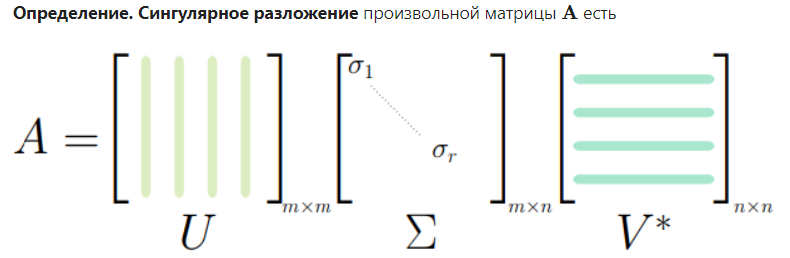
U, V - унитарные

Для доказательства данного утверждения, мы начнем с выражения $L_2$ нормы ошибки между исходными данными $X$ и восстановленными данными $\tilde{X}$:

$\begin{align*}
\frac{1}{l}\|X-\tilde{X}\|^2 &= \frac{1}{l}\|X - (V \sqrt{\tilde{\Lambda}} U^T)\|^2 \\
&= \frac{1}{l}\|(V \sqrt{\Lambda} U^T - V \sqrt{\tilde{\Lambda}} U^T)\|^2 \\
&= \frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) U^T\|^2.
\end{align*}$

Теперь мы воспользуемся свойствами сингулярного разложения матрицы $X$. Заметим, что матрица $U$ ортогональна, а матрица $V$ тоже ортогональна, поэтому $V^T V = I$ и $U^T U = I$, где $I$ - единичная матрица. Это позволяет нам упростить выражение:

$
\begin{align*}
\frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) U^T\|^2 &= \frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) U^T (U U^T) V^T\|^2 \\
&= \frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) (U^T U) V^T\|^2 \\
&= \frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T\|^2.
\end{align*}$

Здесь мы воспользовались тем, что $U^T U$ равно единичной матрице.

Теперь мы можем раскрыть квадрат нормы матрицы:

$
\begin{align*}
\frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T\|^2 &= \frac{1}{l} \text{tr}\left((V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T)^T(V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T)\right) \\
&= \frac{1}{l} \text{tr}\left((\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})^T\right) \\
&= \frac{1}{l} \text{tr}\left((\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})(\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})^T\right).
\end{align*}$

Теперь обратим внимание на то, что $\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}$ - это диагональная матрица, у которой элементы равны $\sqrt{\lambda_i} - \sqrt{\tilde{\lambda_i}}$ на диагонали, где $i$ - индекс элемента. Таким образом, квадрат элемента этой матрицы равен $(\sqrt{\lambda_i} - \sqrt{\tilde{\lambda_i}})^2$.

Таким образом, мы можем переписать след трассы выше как сумму квадратов элементов матрицы:

$
\begin{align*}
\frac{1}{l} \text{tr}\left((\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})(\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}})^T\right) &= \frac{1}{l} \sum_{i=1}^F (\sqrt{\lambda_i} - \sqrt{\tilde{\lambda_i}})^2.
\end{align*}$

Теперь мы видим, что это выражение представляет собой сумму квадратов разностей сингулярных чисел. Однако, нам интересны только те сингулярные числа, которые соответствуют "отброшенным" главным компонентам, то есть сингулярным числам с номерами от $\tilde{F}+1$ до $F$. Поэтому мы можем переписать выражение выше как:

$
\begin{align*}
\frac{1}{l}\|V (\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}) V^T\|^2 &= \frac{1}{l} \sum_{i=\tilde{F}+1}^F (\sqrt{\lambda_i} - \sqrt{\tilde{\lambda_i}})^2.
\end{align*}$

Итак, мы доказали, что $L_2$ норма ошибки между исходными данными и восстановленными данными выражается как сумма квадратов разностей сингулярных чисел от $\tilde{F}+1$ до $F$:

$\frac{1}{l}\|X-\tilde{X}\|^2 = \sum_{i=\tilde{F}+1}^F (\sqrt{\lambda_i} - \sqrt{\tilde{\lambda_i}})^2$.


**Теоретический вопрос 2.**

Покажите, что сингулярный вектор матрицы $X$, отвечающий наибольшему сингулярному числу, является решением задачи

$$
\boldsymbol{u}=\operatorname{argmax}_{|| \boldsymbol{u} \|=1}(X \boldsymbol{u})^2,
$$

где подразумевается матричное умножение $X$ на $\boldsymbol{u}$.



__Решение:__
Для начала, рассмотрим сингулярное разложение матрицы $\boldsymbol{X}$:

$$ \boldsymbol{X} = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{V}^T, $$

A.)
где $\boldsymbol{U}$ - матрица левых сингулярных векторов, $\boldsymbol{\Lambda}$ - диагональная матрица с сингулярными числами на диагонали, упорядоченными в убывающем порядке, и $\boldsymbol{V}$ - матрица правых сингулярных векто \\

(Левые сингулярные векторы образуют ортонормированный базис в пространстве, порождаемом строками А \\ 
Правые сингулярные векторы образуют ортонормированный базис в пространстве, порождаемом столбцами А)ров.

Наибольшее сингулярное число матрицы $\boldsymbol{X}$ равно $\sigma_1$, и оно соответствует первому элементу на диагонали матрицы $\boldsymbol{\Lambda}$, то есть $\sigma_1 = \Lambda_{11}$.

Сингулярный вектор, отвечающий наибольшему сингулярному числу, является первым столбцом матрицы $\boldsymbol{U}$, обозначим его как $\boldsymbol{u}_1 = U_{:,1}$.

Теперь рассмотрим выражение $(X\boldsymbol{u})^2$:

$$
\begin{align*}
(X\boldsymbol{u})^2 &= (U \boldsymbol{\Lambda} \boldsymbol{V}^T \boldsymbol{u})^2 \\
&= (U (\boldsymbol{\Lambda} (\boldsymbol{V}^T \boldsymbol{u})) )^2 \\
&= (U \boldsymbol{\Lambda} \boldsymbol{v})^2,
\end{align*}
$$

где мы обозначили $\boldsymbol{V}^T \boldsymbol{u}$ как $\boldsymbol{v}$.

Далее, учитывая, что $\boldsymbol{\Lambda}$ - диагональная матрица, умножение на нее равносильно умножению каждого элемента на диагонали на соответствующий элемент вектора $\boldsymbol{v}$. Таким образом, выражение можно переписать следующим образом:

$$ (X\boldsymbol{u})^2 = (U \boldsymbol{\Lambda} \boldsymbol{v})^2 = \left(\sigma_1 U \begin{bmatrix}1 \\ 0 \\ 0 \\ \vdots \\ 0\end{bmatrix} \boldsymbol{v}\right)^2 = \left(\sigma_1 U_{:,1} \boldsymbol{v}\right)^2 = (\sigma_1 \boldsymbol{u}_1 \boldsymbol{v})^2. $$

Теперь мы видим, что выражение $(X\boldsymbol{u})^2$ равно квадрату скалярного произведения векторов $\sigma_1 \boldsymbol{u}_1$ и $\boldsymbol{v}$, которое максимально возможное значение, так как $\sigma_1$ - наибольшее сингулярное число.

Таким образом, сингулярный вектор $\boldsymbol{u}_1$ является решением задачи:

$$ \boldsymbol{u}_1 = \operatorname{argmax}_{\|\boldsymbol{u}\|=1}(X\boldsymbol{u})^2, $$

где матричное умножение $\boldsymbol{X}$ на $\boldsymbol{u}$ приводит к максимизации квадрата скалярного произведения этих векторов, что и требовалось доказать.


**Практическое задание.**

Сгенерируйте случайную симметричную матрицу $A$ размера $3 \times 3$. Сгенерируйте $N$ элементов из нормального распределения $P \propto e^{-\boldsymbol{x}^T} A \boldsymbol{x}$ (получится матрица объект-признак $X$ размерности $N \times 3$ ). Визуализируйте полученное облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом ipyml в системе jupyter). Примените к матрице $X$ метод главных компонент, визуализируйте сингулярные вектора вместе с облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

**Метод главных компонент (PCA)** — это статистический метод, используемый для уменьшения размерности данных. 
1. 
Центрирование данных: Вычитываются средние значения признаков, чтобы данные были центрированы вокруг нул
   .2. 

Вычисление ковариационной матрицы: Строится ковариационная матрица, описывающая связи между признакм  
3. и.

Собственные значения и собственные векторы: Вычисляются собственные значения и собственные векторы ковариационной мар  
4. ицы.

Выбор компонент: Собственные векторы, соответствующие наибольшим собственным значениям, выбираются как новые оси (глмвные компн  
5. енты).

Проецирование данных: Исходные данные проецируются на новые оси (главные компоненты), формируя новое пространство признаков с меньшей размерностью.

Результатом работы PCA являются новые признаки (главные компоненты), упорядоченные по убыванию доли объясненной дисперсии. Этот метод часто используется для сжатия данных и выделения наиболее значимых аспектов в данных.

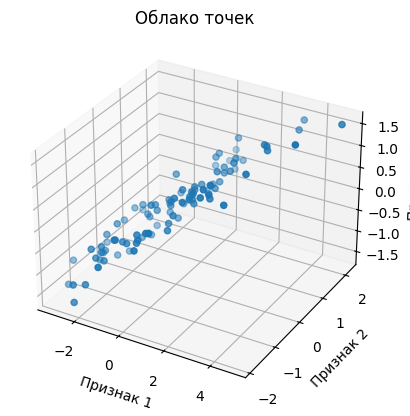

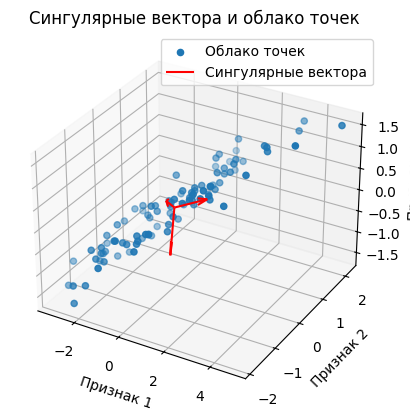

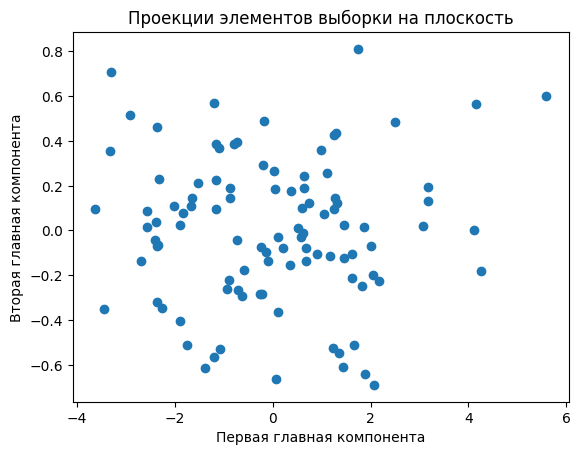

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

A = np.random.rand(3, 3)
A = A @ A.T  # Делаем случ. матрицу симметричной

N = 100  # Количество элементов выборки
mean = np.zeros(3)  # Среднее значение для нормального распределения
X = np.random.multivariate_normal(mean, A, N) #выборка из норм. распр.

# Визуализация облака точек
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Облако точек')
plt.show()

# Метод главных компонент
pca = PCA(n_components=3)
pca.fit(X) #подгоняет модель к данным.

# Визуализация сингулярных векторов
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], label='Облако точек')
ax.quiver(pca.mean_[0], pca.mean_[1], pca.mean_[2], pca.components_[0, :], pca.components_[1, :], pca.components_[2, :],
          color='r', label='Сингулярные вектора') #визуализация синг. векторов, начиная с точки, представляющей ср. знач, и направленных вдоль первых трех главных компонент. 
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Сингулярные вектора и облако точек')
ax.legend()
plt.show()

# Вычисление проекций элементов выборки на плоскость, задаваемую первыми двумя сингулярными векторами
projected_X = pca.transform(X)

# Визуализация проекций
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Проекции элементов выборки на плоскость')
plt.show()


## 5. Геометрический смысл сингулярного разложения.

**Теоретический вопрос 1.**

Пусть дан набор точек на плоскости $\left(x_i, y_i\right)$, для которых выборочные средние $x_i$ и $y_i$ равны нулю. Покажите, что сингулярный вектор для матрицы объект-признак, отвечающий наибольшему сингулярному числу, задает прямую $a$ (проходящую через начало координат), которая является решением следующей задачи оптимизации:
$$
L^{\prime}=\sum_{i=1}^N \operatorname{distance}^2\left[\left(x_i, y_i\right) ; a\right] \quad \longrightarrow \quad \min _a,
$$
где distance $\left[\left(x_i, y_i\right) ; a\right]$ - расстояние от точки $\left(x_i, y_i\right)$ до прямой $a$ (равное длине перпендикуляра).
Обратите внимание, что такая задача отличается от задачи МНК, в которой расстояние от точки до аппроксимирующей прямой вычисляется не по перпендикуляру, а вдоль оси $y$, отвечающей целевой переменной.

Пусть дан набор точек на плоскости $\left(x_i, y_i\right)$, для которых выборочные средние $x_i$ и $y_i$ равны нулю. Покажем, что сингулярный вектор для матрицы объект-признак, отвечающий наибольшему сингулярному числу, задает прямую $a$ (проходящую через начало координат), которая является решением следующей задачи оптимизации:
$$L'=\sum_{i=1}^N \operatorname{distance}^2\left[\left(x_i, y_i\right) ; a\right] \quad \longrightarrow \quad \min _a,$$
где distance $\left[\left(x_i, y_i\right) ; a\right]$ - расстояние от точки $\left(x_i, y_i\right)$ до прямой $a$ (равное длине перпендикуляра).

Обратим внимание, что такая задача отличается от задачи МНК, в которой расстояние от точки до аппроксимирующей прямой вычисляется не по перпендикуляру, а вдоль оси $y$, отвечающей целевой переменной.


**Теоретический вопрос 2.**

Пусть дан набор из $N$ точек в трехмерном пространстве $X_{i \alpha}, i \in\{1, \ldots, N\}, \alpha \in\{1,2,3\}$. Покажите, что задача нахождения сингулярных чисел матрицы $X$ эквивалентна нахождению главных моментов инерции твердого тела, составленного из набора точечных масс, расположенных в точках $\left(X_{i 1}, X_{i 2}, X_{i 3}\right)$ (можно представлять себе, что точечные массы соединены между собой невесомыми и абсолютно жесткими стержнями).


Для понимания этой аналогии между сингулярными числами матрицы $\boldsymbol{X}$ и главными моментами инерции твердого тела, представим, что у нас есть набор точек в трехмерном пространстве, представляющих точечные массы. Мы хотим найти главные моменты инерции этого твердого тела относительно его центра масс.

Пусть $X_{i\alpha}$ - это координаты точек в трехмерном пространстве. Центр масс этой системы точечных масс может быть определен следующим образом:

$$ X_{\text{цм}\alpha} = \frac{1}{N}\sum_{i=1}^{N} X_{i\alpha}, $$

где $X_{\text{цм}\alpha}$ - координаты центра масс.

Затем мы можем определить тензор инерции относительно центра масс этой системы точечных масс:

$$ I_{\alpha \beta} = \sum_{i=1}^{N} m_i \left(\|\mathbf{r}_i\|^2\delta_{\alpha\beta} - X_{i\alpha}X_{i\beta}\right), $$

где $m_i$ - массы точек, $\mathbf{r}_i$ - радиус-векторы относительно центра масс, и $\delta_{\alpha\beta}$ - символ Кронекера.

Сингулярное разложение матрицы $\boldsymbol{X}$ имеет следующий вид:

$$ \boldsymbol{X} = \boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V}^T, $$

где $\boldsymbol{U}$ - матрица левых сингулярных векторов, $\boldsymbol{\Sigma}$ - диагональная матрица с сингулярными числами на диагонали, упорядоченными в убывающем порядке, и $\boldsymbol{V}$ - матрица правых сингулярных векторов.

Сингулярные числа матрицы $\boldsymbol{X}$ являются корнями из главных моментов инерции твердого тела, составленного из набора точечных масс, расположенных в точках $\left(X_{i1}, X_{i2}, X_{i3}\right)$ относительно его центра масс. Главные моменты инерции описывают способность твердого тела сопротивляться вращательным движениям вокруг его главных осей.

Таким образом, задача нахождения сингулярных чисел матрицы $\boldsymbol{X}$ эквивалентна задаче нахождения главных моментов инерции твердого тела, составленного из точечных масс, расположенных в заданных точках в трехмерном пространстве. Это связано с тем, что сингулярные числа матрицы $\boldsymbol{X}$ отражают степень разброса точек относительно их центра масс, что аналогично тому, как главные моменты инерции характеризуют способность тела вращаться вокруг его главных осей.


**Практическое задание.**

Пусть в SVD-разложении можно пренебречь следующими малыми сингулярными значениями: $\varepsilon>\sigma_{r+1} \geq \sigma_{r+2} \geq \cdots \geq \sigma_n$. $\left(\varepsilon=10^{-8}\right)$. Тогда $x_{T S V D}=\sum_{i=1}^r \sigma_i^{-1} v_i\left(u_i^T b\right)(*)$. Параметр $\varepsilon$ определяет версию усеченного SVD (TSVD). Решение TSVD (* ) широко используется в качестве упорядоченного решения задачи. Однако решение (*) не является достаточно точным. Это может быть указано следующим образом.

Пусть матрицы левого и правого сингулярных векторов TSVD обозначены как $U_{T S V D}=\left[u_1, \ldots, u_r\right]$ и $V_{T S V D}=\left[v_1, \ldots, v_r\right]$, а их ортогональное дополнение $\widetilde{U_{a d d}}=\left[\widetilde{u_{r+1}}, \ldots, \widetilde{u_n}\right]$ и $\widetilde{V_{a d d}}=$ $\left[\widetilde{v_{r+1}}, \ldots, \widetilde{v_n}\right]$. Тогда решение системы будет выглядеть следующим образом:

$$
x=x_{T S V D}+\widetilde{V_{a d d}} Z_2
$$
Вектор $z_2$ находится: $\mathrm{C}_2=b_2$, где $C={\widetilde{U_{a d d}}}^T A \widetilde{V_{a d d}}, \quad b_2=$ ${\widetilde{U_{a d d}}}^T b$.

Рассмотрим в качестве примера СЛАУ с матрицей Гильберта, компоненты которой задаются формулой $H_{i, j}=\frac{1}{i+j-1}, i, j=\overline{1, n}$. Она относится к числу плохо обусловленных матриц. Характерная особенность этой матрицы в том, что при возрастании еe порядка минимальные собственные числа (сингулярные числа) очень быстро стремятся к нулю.

Решите систему обычным стандартным методом (из библиотеки numpy) и этим методом. Оцените невязку.

 $H_n x_n=b_n$, где $b_n=\{1,0,0,0,0,0,0,0\}$ для $\mathrm{n}=8$, $b_n=\{1,0,0,0,0,0,0,0,0,0\}$ для $\mathrm{n}=10$.

Число обусловленности для матрицы $\mathrm{H}_8$ равно $3.387 \cdot 10^{10}$, а для $\mathrm{H}_{10}$ равно $3.535 \cdot 10^{13}$.



__Решение:__

SVD - разложение на унитарную матрицу левых сингулярных векторов, диагональную матрицу сингулярных значений и унитарную матрицу правых сингулярных векторов.

Для решения этой задачи, мы сначала создадим матрицу Гильберта $H_n$ для $n = 8$ и $n = 10$ и векторы $b_n$. Затем мы решим систему уравнений $H_n x_n = b_n$ сначала с использованием стандартного метода (из библиотеки numpy), а затем с использованием метода усеченного SVD.

Давайте начнем с создания матриц и векторов и решения систем уравнений.

In [18]:
# n = 8

# Создание матрицы Гильберта H_8
n = 8
H_8 = np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])

# Вектор b_8
b_8 = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# Решение системы H_8 x_8 = b_8 с использованием numpy
x_8_standard = np.linalg.solve(H_8, b_8)

# Расчет усеченного SVD для H_8
U, S, Vt = np.linalg.svd(H_8, full_matrices=False)
epsilon = 1e-8  # Порог усечения
r = np.sum(S > epsilon)
U_trunc = U[:, :r]
S_trunc = S[:r]
Vt_trunc = Vt[:r, :]

# Решение системы H_8 x_8 = b_8 с использованием метода усеченного SVD
b_8_tilde = np.dot(U[:, r:].T, b_8)
C_2 = np.dot(U[:, r:].T, np.dot(H_8, Vt[:, r:]))
z_2 = np.linalg.solve(C_2, b_8_tilde)
x_8_tsvd = np.dot(Vt[:, :r], np.dot(np.diag(1 / S_trunc), np.dot(U_trunc.T, b_8))) + np.dot(Vt[:, r:], z_2)

# Оценка невязки
residual_8_standard = np.linalg.norm(np.dot(H_8, x_8_standard) - b_8)
residual_8_tsvd = np.linalg.norm(np.dot(H_8, x_8_tsvd) - b_8)

print("Стандартное решение x_8_standard:", x_8_standard)
print("Решение с использованием усеченного SVD x_8_tsvd:", x_8_tsvd)
print("Невязка стандартного решения:", residual_8_standard)
print("Невязка решения с использованием усеченного SVD:", residual_8_tsvd)


Стандартное решение x_8_standard: [ 6.40000013e+01 -2.01600006e+03  2.01600008e+04 -9.24000041e+04
  2.21760011e+05 -2.88288015e+05  1.92192010e+05 -5.14800029e+04]
Решение с использованием усеченного SVD x_8_tsvd: [-1650422.0149413  -3356346.63310532  4671209.94102179  5412857.31861656
  5413843.42958757  4614968.71824026  3187592.21416559 -1550003.50924329]
Невязка стандартного решения: 1.0289757937229989e-11
Невязка решения с использованием усеченного SVD: 4849640.667151633


In [19]:
# n = 10

# Создание матрицы Гильберта H_10
n = 10
H_10 = np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])

# Вектор b_10
b_10 = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Решение системы H_10 x_10 = b_10 с использованием numpy
x_10_standard = np.linalg.solve(H_10, b_10)

# Расчет усеченного SVD для H_10 (аналогично как для H_8)
U, S, Vt = np.linalg.svd(H_10, full_matrices=False)
epsilon = 1e-8  # Порог усечения
r = np.sum(S > epsilon)
U_trunc = U[:, :r]
S_trunc = S[:r]
Vt_trunc = Vt[:r, :]

# Решение системы H_10 x_10 = b_10 с использованием метода усеченного SVD
b_10_tilde = np.dot(U[:, r:].T, b_10)
C_2 = np.dot(U[:, r:].T, np.dot(H_10, Vt[:, r:]))
z_2 = np.linalg.solve(C_2, b_10_tilde)
x_10_tsvd = np.dot(Vt[:, :r], np.dot(np.diag(1 / S_trunc), np.dot(U_trunc.T, b_10))) + np.dot(Vt[:, r:], z_2)

# Оценка невязки
residual_10_standard = np.linalg.norm(np.dot(H_10, x_10_standard) - b_10)
residual_10_tsvd = np.linalg.norm(np.dot(H_10, x_10_tsvd) - b_10)

print("Стандартное решение x_10_standard:", x_10_standard)
print("Решение с использованием усеченного SVD x_10_tsvd:", x_10_tsvd)
print("Невязка стандартного решения:", residual_10_standard)
print("Невязка решения с использованием усеченного SVD:", residual_10_tsvd)


Стандартное решение x_10_standard: [ 9.99994494e+01 -4.94995167e+03  7.91989588e+04 -6.00590451e+05
  2.52247413e+06 -6.30617316e+06  9.60939088e+06 -8.75139707e+06
  4.37569308e+06 -9.23756412e+05]
Решение с использованием усеченного SVD x_10_tsvd: [ 1.51892075e+08  2.63255499e+08 -2.13134647e+08  7.86317290e+07
  6.00443534e+08  1.18835597e+09  1.54929325e+09  1.42702271e+09
  8.44370340e+08 -1.95433009e+08]
Невязка стандартного решения: 5.12425812824484e-10
Невязка решения с использованием усеченного SVD: 1950166900.4345872
